# Astroplan Testing Notebook
Authors: Adrienne and Rachel

In [1]:
from astropy.time import Time
from astroplan import plots
import numpy as np
import matplotlib.pyplot as plt
import pytz
import astropy.units as u
from astroplan import EclipsingSystem
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget, Observer, EclipsingSystem
from astroplan import (PrimaryEclipseConstraint, is_event_observable,
                       AtNightConstraint, AltitudeConstraint, LocalTimeConstraint)
import datetime as dt

In [2]:
### No need to change for BoiseState
boiseState = Observer(longitude=-116.208710*u.deg, latitude=43.602*u.deg,
                  elevation=821*u.m, name="BoiseState", timezone="US/Mountain")

# Change the RA and DEC and name for target
coords = SkyCoord(ra=187.055897*u.deg, dec=67.240043*u.deg)
tar = FixedTarget(coord=coords, name="TOI1179.01")
target = FixedTarget.from_name('TOI1179.01')

#### Change value to mid transit time.
primary_eclipse_time = Time(2458929.418, format='jd')  

### Change orbital period in days
orbital_period = 1.262* u.day

### Change to duration in days with a hour padded
eclipse_duration = (0.046850+(1/12))* u.day

# change name to target name
transit = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='TOI1179.01')


obs_time = Time('2024-10-01 00:00') # Change to date that you want to start looking for transits
n_transits = 100 # number of transits
min_local_time = dt.time(2, 0) # local time plus 6 for utc constraint
max_local_time = dt.time(10, 0) # local time plus 6 for utc constraint
constraints = [AltitudeConstraint(min=30*u.deg), LocalTimeConstraint(min=min_local_time, max=max_local_time)]

In [3]:
midtransit_times = transit.next_primary_eclipse_time(obs_time, n_eclipses=n_transits)
# event times and time constraint have to be in the same time zone (utc)
constraints = [AltitudeConstraint(min=30*u.deg), LocalTimeConstraint(min=min_local_time, max=max_local_time)]
ing_egr = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=n_transits)
# change to mtd

mdt = pytz.timezone('US/Mountain')
mdt_datetime = ing_egr.to_datetime(timezone = mdt)
ing_egr_bool = is_event_observable(constraints, boiseState, target, times_ingress_egress=ing_egr)
print(ing_egr_bool)
filtered_ing_egr = [time for time, is_observable in zip(mdt_datetime, ing_egr_bool[0]) if is_observable]
meep = 0
for i in filtered_ing_egr:
    ing = i[0] #.iso
    egr = i[1] #.iso
    print(f"Eclipse {meep+1}: Padded_Ingress: {ing}, Padded_Egress: {egr}")
    meep += 1

next_eclipses = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=10)
# Convert the ingress and egress times to ISO format
ingress_times_iso = [Time(t[0], format='jd').iso for t in next_eclipses]
egress_times_iso = [Time(t[1], format='jd').iso for t in next_eclipses]

# Print the results
for i, (ingress, egress) in enumerate(zip(ingress_times_iso, egress_times_iso)):
    print(f"Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False  True False False False  True False
  False False  True False]]
Eclipse 1: Padded_Ingress: 2025-01-03 22:55:32.880025-07:00, Padded_Egress: 2025-01-04 02:03:00.720001-07:00
Eclipse 2: Padded_Ingress: 2025-01-22 21:14:44.879999-07:00, Padded_Egress: 2025-01-23 00:22:12.720016-07:00
Eclipse 3: Padded_Ingress: 2025-01-27 22:23:52.079995-07:00, Padded_Egress: 2025-01-28 01:31:19.920012-07:00
Eclipse 4: Padded_Ingress: 2025-02-01 23:32:59.279990

In [5]:
#### For TrES 3 the next observable should be 08/02 at 0:16 - 3:37

In [6]:
# midtransit_times_mdt = []
# for utc_time in midtransit_times:
#     # Convert to datetime object in UTC
#     utc_datetime = utc_time.to_datetime()
    
#     # Convert UTC datetime to MDT
#     mdt_datetime = utc_datetime.astimezone(mdt)
    
#     # Append the converted time to the midtransit_times_mdt list
#     midtransit_times_mdt.append(mdt_datetime)

# # Print the list of mid-transit times in MDT
# print("Mid-transit times in MDT:")
# for mdt_time in midtransit_times_mdt:
#     print(mdt_time.isoformat())
# mdt_times = []
# for utc_time in midtransit_times:
#     # Convert to datetime object in UTC
#     utc_datetime = utc_time.to_datetime()
    
#     # Convert UTC datetime to MDT
#     mdt_datetime = utc_datetime.astimezone(mdt)
    
#     # Append the converted time to the mdt_times list
#     mdt_times.append(mdt_datetime)

# # Print the converted times
# for i, (utc_time, mdt_time) in enumerate(zip(midtransit_times, mdt_times)):
#     print(f"Mid-transit Time {i+1}:")
#     print(f"UTC Time: {utc_time.iso} UTC")
#     print(f"MDT Time: {mdt_time.isoformat()} MDT\n")

In [7]:
### No need to change for BoiseState
boiseState = Observer(longitude=-116.208710*u.deg, latitude=43.602*u.deg,
                  elevation=821*u.m, name="BoiseState", timezone="US/Mountain")

coords = SkyCoord(ra=33.505238*u.deg, dec=53.121508*u.deg)
tar = FixedTarget(coord=coords, name="TOI1564.01")

#### Change value to mid transit time.
primary_eclipse_time = Time(2458860.605, format='jd')  

### Change orbital period in days
orbital_period = 0.5596701192* u.day

### Change to duration in days with a hour padded
eclipse_duration = (0.097875+(1/12))* u.day

### Change name to target
transit = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='TOI1564.01')
target = FixedTarget.from_name('TOI1564.01')


### Change to sunset and sunrise
obs_time = Time('2024-10-1 00:00')
n_transits = 30
min_local_time = dt.time(0, 0) # local time plus 6 for utc constraint
max_local_time = dt.time(10, 0) 

midtransit_times = transit.next_primary_eclipse_time(obs_time, n_eclipses=n_transits)
# event times and time constraint have to be in the same time zone (utc)
constraints = [AltitudeConstraint(min=30*u.deg), LocalTimeConstraint(min=min_local_time, max=max_local_time)]
ing_egr = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=n_transits)
# change to mtd

mdt = pytz.timezone('US/Mountain')
mdt_datetime = ing_egr.to_datetime(timezone = mdt)
ing_egr_bool = is_event_observable(constraints, boiseState, target, times_ingress_egress=ing_egr)
filtered_ing_egr = [time for time, is_observable in zip(mdt_datetime, ing_egr_bool[0]) if is_observable]
meep = 0
for i in filtered_ing_egr:
    ing = i[0] #.iso
    egr = i[1] #.iso
    print(f"Eclipse {meep+1}: Ingress: {ing}, Egress: {egr}")
    meep += 1

next_eclipses = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=30)
# Convert the ingress and egress times to ISO format
ingress_times_iso = [Time(t[0], format='jd').iso for t in next_eclipses]
egress_times_iso = [Time(t[1], format='jd').iso for t in next_eclipses]

# Print the results
for i, (ingress, egress) in enumerate(zip(ingress_times_iso, egress_times_iso)):
    print(f"Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

Eclipse 1: Ingress: 2024-10-03 21:45:11.550330-06:00, Egress: 2024-10-04 02:06:07.950341-06:00
Eclipse 2: Ingress: 2024-10-08 22:38:31.035047-06:00, Egress: 2024-10-09 02:59:27.435019-06:00
Eclipse 3: Ingress: 2024-10-12 20:39:59.523108-06:00, Egress: 2024-10-13 01:00:55.923119-06:00
Eclipse 4: Ingress: 2024-10-13 23:31:50.519725-06:00, Egress: 2024-10-14 03:52:46.919737-06:00
Eclipse 1: Padded_Ingress: 2024-10-01 08:35:34.059, Padded_Egress: 2024-10-01 12:56:30.459
Eclipse 2: Padded_Ingress: 2024-10-01 22:01:29.557, Padded_Egress: 2024-10-02 02:22:25.957
Eclipse 3: Padded_Ingress: 2024-10-02 11:27:25.055, Padded_Egress: 2024-10-02 15:48:21.455
Eclipse 4: Padded_Ingress: 2024-10-03 00:53:20.554, Padded_Egress: 2024-10-03 05:14:16.954
Eclipse 5: Padded_Ingress: 2024-10-03 14:19:16.052, Padded_Egress: 2024-10-03 18:40:12.452
Eclipse 6: Padded_Ingress: 2024-10-04 03:45:11.550, Padded_Egress: 2024-10-04 08:06:07.950
Eclipse 7: Padded_Ingress: 2024-10-04 17:11:07.049, Padded_Egress: 2024-10

In [21]:
### No need to change for BoiseState
boiseState = Observer(longitude=-116.208710*u.deg, latitude=43.602*u.deg,
                  elevation=821*u.m, name="BoiseState", timezone="US/Mountain")

coords = SkyCoord(ra=268.029111*u.deg, dec=37.546327*u.deg)
tar = FixedTarget(coord=coords, name="TrES-3b")

#### Change value to mid transit time.
# 2454185.9104 (exoplanet archive)
# 2460473.89324 (boise state 6-11)
primary_eclipse_time = Time(2454185.9104 , format='jd')  

### Change orbital period in days
orbital_period = 1.30618581* u.day

### Change to duration in days with a hour padded
eclipse_duration = (0.054916667+(1/12))* u.day

### Change name to target
transit = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='TrES-3b')
target = FixedTarget.from_name('HAT-P-23b') # USING HAT-P-23


### Change to sunset and sunrise
obs_time = Time('2024-07-1 00:00')
n_transits = 10
min_local_time = dt.time(2, 0) # local time plus 6 for utc constraint
max_local_time = dt.time(10, 0) 

midtransit_times = transit.next_primary_eclipse_time(obs_time, n_eclipses=n_transits)
# event times and time constraint have to be in the same time zone (utc)
constraints = [AltitudeConstraint(min=30*u.deg), LocalTimeConstraint(min=min_local_time, max=max_local_time)]
# constraints = [LocalTimeConstraint(min=min_local_time, max=max_local_time)]
ing_egr = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=n_transits)
ingress_times_iso_t = [Time(t[0], format='jd').iso for t in ing_egr]
egress_times_iso_t = [Time(t[1], format='jd').iso for t in ing_egr]
for i, (ingress, egress) in enumerate(zip(ingress_times_iso_t, egress_times_iso_t)):
    print(f" Before Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

# change to mtd

mdt = pytz.timezone('US/Mountain')
mdt_datetime = ing_egr.to_datetime(timezone = mdt)
ing_egr_bool = is_event_observable(constraints, boiseState, target, times_ingress_egress=ing_egr)
filtered_ing_egr = [time for time, is_observable in zip(mdt_datetime, ing_egr_bool[0]) if is_observable]
meep = 0
for i in filtered_ing_egr:
    ing = i[0] #.iso
    egr = i[1] #.iso
    print(f"Filtered Eclipse {meep+1}: Ingress: {ing}, Egress: {egr}")
    meep += 1

# produces the schedule in utc with nothing filtered out
next_eclipses = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=30)
# Convert the ingress and egress times to ISO format
ingress_times_iso = [Time(t[0], format='jd').iso for t in next_eclipses]
egress_times_iso = [Time(t[1], format='jd').iso for t in next_eclipses]

# Print the results
for i, (ingress, egress) in enumerate(zip(ingress_times_iso, egress_times_iso)):
    print(f" Next Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

 Before Eclipse 1: Padded_Ingress: 2024-07-01 21:54:00.449, Padded_Egress: 2024-07-02 01:13:05.249
 Before Eclipse 2: Padded_Ingress: 2024-07-03 05:14:54.903, Padded_Egress: 2024-07-03 08:33:59.703
 Before Eclipse 3: Padded_Ingress: 2024-07-04 12:35:49.357, Padded_Egress: 2024-07-04 15:54:54.157
 Before Eclipse 4: Padded_Ingress: 2024-07-05 19:56:43.811, Padded_Egress: 2024-07-05 23:15:48.611
 Before Eclipse 5: Padded_Ingress: 2024-07-07 03:17:38.265, Padded_Egress: 2024-07-07 06:36:43.065
 Before Eclipse 6: Padded_Ingress: 2024-07-08 10:38:32.719, Padded_Egress: 2024-07-08 13:57:37.519
 Before Eclipse 7: Padded_Ingress: 2024-07-09 17:59:27.173, Padded_Egress: 2024-07-09 21:18:31.973
 Before Eclipse 8: Padded_Ingress: 2024-07-11 01:20:21.627, Padded_Egress: 2024-07-11 04:39:26.427
 Before Eclipse 9: Padded_Ingress: 2024-07-12 08:41:16.081, Padded_Egress: 2024-07-12 12:00:20.881
 Before Eclipse 10: Padded_Ingress: 2024-07-13 16:02:10.535, Padded_Egress: 2024-07-13 19:21:15.335
Filtered 

In [9]:
# Eclipse 1: Ingress: 2024-10-12 20:03:53.712003-06:00, Egress: 2024-10-12 23:28:57.360013-06:00

Altitude of TrES-3b at 2024-07-10 08:00:00.000: 60.77 deg


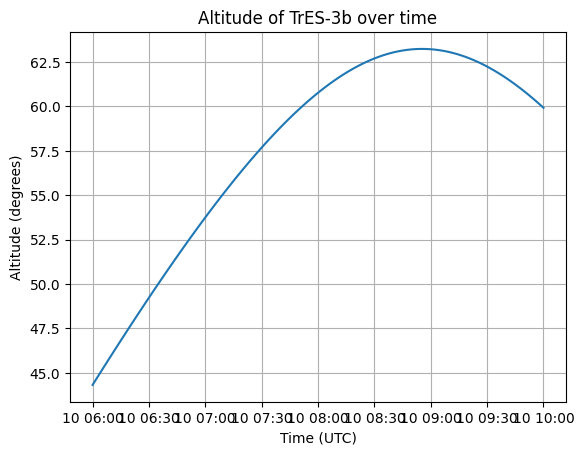

<Axes: xlabel='Time from 2024-07-09 [UTC]', ylabel='Airmass'>

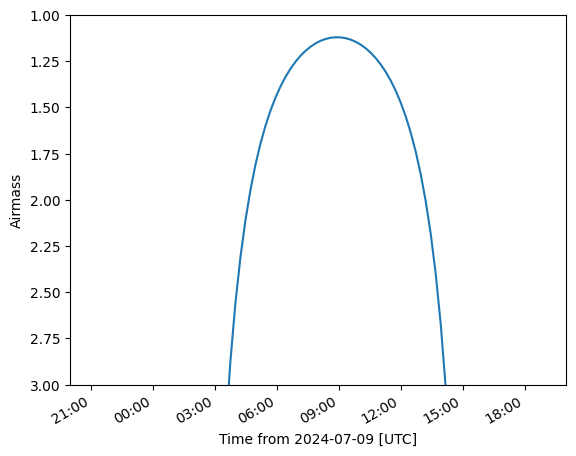

In [20]:
# Altitude at the specific time
obs_time = Time('2024-07-10 08:00')
altitude = boiseState.altaz(obs_time, target).alt
print(f"Altitude of TrES-3b at {obs_time}: {altitude:.2f}")

# For multiple times, create an array of observation times
obs_times = obs_time + np.linspace(-2, 2, 100) * u.hour  # 4-hour window centered on obs_time

# Compute the altitude for each time
altitudes = boiseState.altaz(obs_times, target).alt

# Plot the altitude over time
plt.plot(obs_times.datetime, altitudes)
plt.xlabel('Time (UTC)')
plt.ylabel('Altitude (degrees)')
plt.title('Altitude of TrES-3b over time')
plt.grid(True)
plt.show()

plots.plot_airmass(target,boiseState,obs_time)

In [ ]:
#  Using astroquery
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
obj_data = NasaExoplanetArchive.query_object('Tres-3b')
### No need to change for BoiseState
boiseState = Observer(longitude=-116.208710*u.deg, latitude=43.602*u.deg,
                  elevation=821*u.m, name="BoiseState", timezone="US/Mountain")

coords = SkyCoord(ra=268.029111*u.deg, dec=37.546327*u.deg)
target = self._create_target_obj( name='Tres-3b')
#### Change value to mid transit time.
# 2454185.9104 (exoplanet archive)
# 2460473.89324 (boise state 6-11)
primary_eclipse_time = Time(2454185.9104 , format='jd')  

### Change orbital period in days
orbital_period = 1.30618581* u.day

### Change to duration in days with a hour padded
eclipse_duration = (0.054916667+(1/12))* u.day

### Change name to target
transit = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='TrES-3b')
target = FixedTarget.from_name('TrES-3b')


### Change to sunset and sunrise
obs_time = Time('2024-10-1 00:00')
n_transits = 10
min_local_time = dt.time(2, 0) # local time plus 6 for utc constraint
max_local_time = dt.time(10, 0) 

midtransit_times = transit.next_primary_eclipse_time(obs_time, n_eclipses=n_transits)
# event times and time constraint have to be in the same time zone (utc)
constraints = [AltitudeConstraint(min=30*u.deg), LocalTimeConstraint(min=min_local_time, max=max_local_time)]
# constraints = [LocalTimeConstraint(min=min_local_time, max=max_local_time)]
ing_egr = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=n_transits)
ingress_times_iso_t = [Time(t[0], format='jd').iso for t in ing_egr]
egress_times_iso_t = [Time(t[1], format='jd').iso for t in ing_egr]
for i, (ingress, egress) in enumerate(zip(ingress_times_iso_t, egress_times_iso_t)):
    print(f" Before Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

# change to mtd

mdt = pytz.timezone('US/Mountain')
mdt_datetime = ing_egr.to_datetime(timezone = mdt)
ing_egr_bool = is_event_observable(constraints, boiseState, target, times_ingress_egress=ing_egr)
filtered_ing_egr = [time for time, is_observable in zip(mdt_datetime, ing_egr_bool[0]) if is_observable]
meep = 0
for i in filtered_ing_egr:
    ing = i[0] #.iso
    egr = i[1] #.iso
    print(f"Filtered Eclipse {meep+1}: Ingress: {ing}, Egress: {egr}")
    meep += 1

# produces the schedule in utc with nothing filtered out
next_eclipses = transit.next_primary_ingress_egress_time(obs_time, n_eclipses=30)
# Convert the ingress and egress times to ISO format
ingress_times_iso = [Time(t[0], format='jd').iso for t in next_eclipses]
egress_times_iso = [Time(t[1], format='jd').iso for t in next_eclipses]

# Print the results
for i, (ingress, egress) in enumerate(zip(ingress_times_iso, egress_times_iso)):
    print(f" Next Eclipse {i+1}: Padded_Ingress: {ingress}, Padded_Egress: {egress}")

NameError: name 'self' is not defined